# Come creare l'istogramma dei caratteri di un testo

Per questo esercizio possiamo usare 

1. la libreria nativa di Python.
2. matplotlib
3. i dataframe di pandas

Consideriamo per esercizio un testo breve. Prenderò l'Infinito di Leopardi.
Immaginiamo di avere il file salvato in formato testuale nella stessa cartella di questo notebook.
Possiamo usare il pattern **with open** che è molto comodo perché ci consente di omettere il file close() alla fine della serie di istruzioni che ci interessa.

In [1]:
with open('linfinito.txt',mode='r') as f:
    lines = f.readlines()
    for word in lines:
        print(word)

Sempre caro mi fu quest'ermo colle,

E questa siepe, che da tanta parte

Dell'ultimo orizzonte il guardo esclude.

Ma sedendo e mirando, interminati

Spazi di là da quella, e sovrumani

Silenzi, e profondissima quiete

Io nel pensier mi fingo; ove per poco

Il cor non si spaura. E come il vento

Odo stormir tra queste piante, io quello

Infinito silenzio a questa voce

Vo comparando: e mi sovvien l'eterno,

E le morte stagioni, e la presente

E viva, e il suon di lei. Così tra questa

Immensità s'annega il pensier mio:

E il naufragar m'è dolce in questo mare.


## Bene!

Come vedi abbiamo usato il ciclo **for** per stampare a schermo ogni singola riga del file, ovvero tutti i versi della poesia.

## Lista delle lettere del testo

Ora la tecnica più immediata per creare una lista di lettere che include tutti caratteri della poesia è un **list comprehension**. Nota che se a questa tecnica avessi preferito un ciclo for annidato in un altro ciclo for avrei ottenuto prestazioni inferiori e pertanto non scalabili. La list comprehension va molto meglio.

In [2]:
let_comprehension = [ch for word in lines for ch in word]
print(let_comprehension)

['S', 'e', 'm', 'p', 'r', 'e', ' ', 'c', 'a', 'r', 'o', ' ', 'm', 'i', ' ', 'f', 'u', ' ', 'q', 'u', 'e', 's', 't', "'", 'e', 'r', 'm', 'o', ' ', 'c', 'o', 'l', 'l', 'e', ',', '\n', 'E', ' ', 'q', 'u', 'e', 's', 't', 'a', ' ', 's', 'i', 'e', 'p', 'e', ',', ' ', 'c', 'h', 'e', ' ', 'd', 'a', ' ', 't', 'a', 'n', 't', 'a', ' ', 'p', 'a', 'r', 't', 'e', '\n', 'D', 'e', 'l', 'l', "'", 'u', 'l', 't', 'i', 'm', 'o', ' ', 'o', 'r', 'i', 'z', 'z', 'o', 'n', 't', 'e', ' ', 'i', 'l', ' ', 'g', 'u', 'a', 'r', 'd', 'o', ' ', 'e', 's', 'c', 'l', 'u', 'd', 'e', '.', '\n', 'M', 'a', ' ', 's', 'e', 'd', 'e', 'n', 'd', 'o', ' ', 'e', ' ', 'm', 'i', 'r', 'a', 'n', 'd', 'o', ',', ' ', 'i', 'n', 't', 'e', 'r', 'm', 'i', 'n', 'a', 't', 'i', '\n', 'S', 'p', 'a', 'z', 'i', ' ', 'd', 'i', ' ', 'l', 'à', ' ', 'd', 'a', ' ', 'q', 'u', 'e', 'l', 'l', 'a', ',', ' ', 'e', ' ', 's', 'o', 'v', 'r', 'u', 'm', 'a', 'n', 'i', '\n', 'S', 'i', 'l', 'e', 'n', 'z', 'i', ',', ' ', 'e', ' ', 'p', 'r', 'o', 'f', 'o', 'n', 'd',

Come vedi il risultato non è bello da vedere, ma il computer può accedere con più facilità ad ogni singolo carattere. Nota che \n vuol dire "vai a capo". 

Qui ho omesso volontarimante di trattare le maiuscole come le minuscole e quindi tutto l'esercizio sarà case-sensitive. Anche le lettere accentate e la punteggiatura saranno trattati come caratteri distinti.

## Lista di caratteri contati una sola volta

Hai visto che in let_comprehension abbiamo molti doppioni? Passiamo allora alla lista dei caratteri contati singolarmente. E mettiamo le voci in ordine. Assoceremo queste voci alla lista delle frequenze per poi generare il nostro bel grafico a barre: l'istogramma!

In [3]:
letter_set_list = list(set(let_comprehension))
letter_set_list.sort()
print(letter_set_list)

['\n', ' ', "'", ',', '.', ':', ';', 'C', 'D', 'E', 'I', 'M', 'O', 'S', 'V', 'a', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'z', 'à', 'è', 'ì']


## Frequenze

Passiamo le frequenze come valori di un dizionario le cui chiavi sono le voci di letter_set_list

In [4]:
letter_freq = {}
for i in letter_set_list:
    letter_freq[i] = let_comprehension.count(i)
    
print(letter_freq)

{'\n': 14, ' ': 84, "'": 5, ',': 9, '.': 4, ':': 2, ';': 1, 'C': 1, 'D': 1, 'E': 5, 'I': 4, 'M': 1, 'O': 1, 'S': 3, 'V': 1, 'a': 34, 'c': 10, 'd': 13, 'e': 58, 'f': 5, 'g': 5, 'h': 1, 'i': 43, 'l': 25, 'm': 19, 'n': 31, 'o': 40, 'p': 13, 'q': 9, 'r': 26, 's': 25, 't': 25, 'u': 17, 'v': 8, 'z': 5, 'à': 2, 'è': 1, 'ì': 1}


## L'istogramma

Ora possiamo usare un codice Python nativo per rappresentare le barre dell'istogramma in orizzontale in modo molto conciso:

In [5]:
u=chr(9608)
print('Istogramma dei caratteri di "L\'Infinito" di G.Leopardi \n')
for k,v in letter_freq.items():
    if k == '\n':
        print('{:2}'.format('\\n'),'{:2}'.format(v),v*u)
    else:
        print('{:2}'.format(k),'{:2}'.format(v),v*u)

Istogramma dei caratteri di "L'Infinito" di G.Leopardi 

\n 14 ██████████████
   84 ████████████████████████████████████████████████████████████████████████████████████
'   5 █████
,   9 █████████
.   4 ████
:   2 ██
;   1 █
C   1 █
D   1 █
E   5 █████
I   4 ████
M   1 █
O   1 █
S   3 ███
V   1 █
a  34 ██████████████████████████████████
c  10 ██████████
d  13 █████████████
e  58 ██████████████████████████████████████████████████████████
f   5 █████
g   5 █████
h   1 █
i  43 ███████████████████████████████████████████
l  25 █████████████████████████
m  19 ███████████████████
n  31 ███████████████████████████████
o  40 ████████████████████████████████████████
p  13 █████████████
q   9 █████████
r  26 ██████████████████████████
s  25 █████████████████████████
t  25 █████████████████████████
u  17 █████████████████
v   8 ████████
z   5 █████
à   2 ██
è   1 █
ì   1 █


In [58]:
with open('output.txt',mode='w',encoding='utf-8') as f:
    u=chr(9608)
    f.write('Istogramma dei caratteri di "L\'Infinito" di G.Leopardi \n\n')
    for k,v in letter_freq.items():
        if k == '\n':
            r = '{:3}'.format('\\n') + '{:3}'.format(v) + v*u + '\n'
            f.write(r)
        else:
            r = '{:3}'.format(k) + '{:3}'.format(v) + v*u + '\n'
            f.write(r)

In [31]:
for k,v in letter_freq.items():
    print(k, v)


 14
  84
' 5
, 9
. 4
: 2
; 1
C 1
D 1
E 5
I 4
M 1
O 1
S 3
V 1
a 34
c 10
d 13
e 58
f 5
g 5
h 1
i 43
l 25
m 19
n 31
o 40
p 13
q 9
r 26
s 25
t 25
u 17
v 8
z 5
à 2
è 1
ì 1


In [34]:
'k '+ u*14

'k ██████████████'

In [45]:
with open('target.txt', mode='w') as target:
    paragraph1 = "%s \n%s \n%s \n" % ('line1', 'line2', 'line3')
    target.write(paragraph1)

## Matplotlib

In [6]:
import matplotlib.pyplot as plt

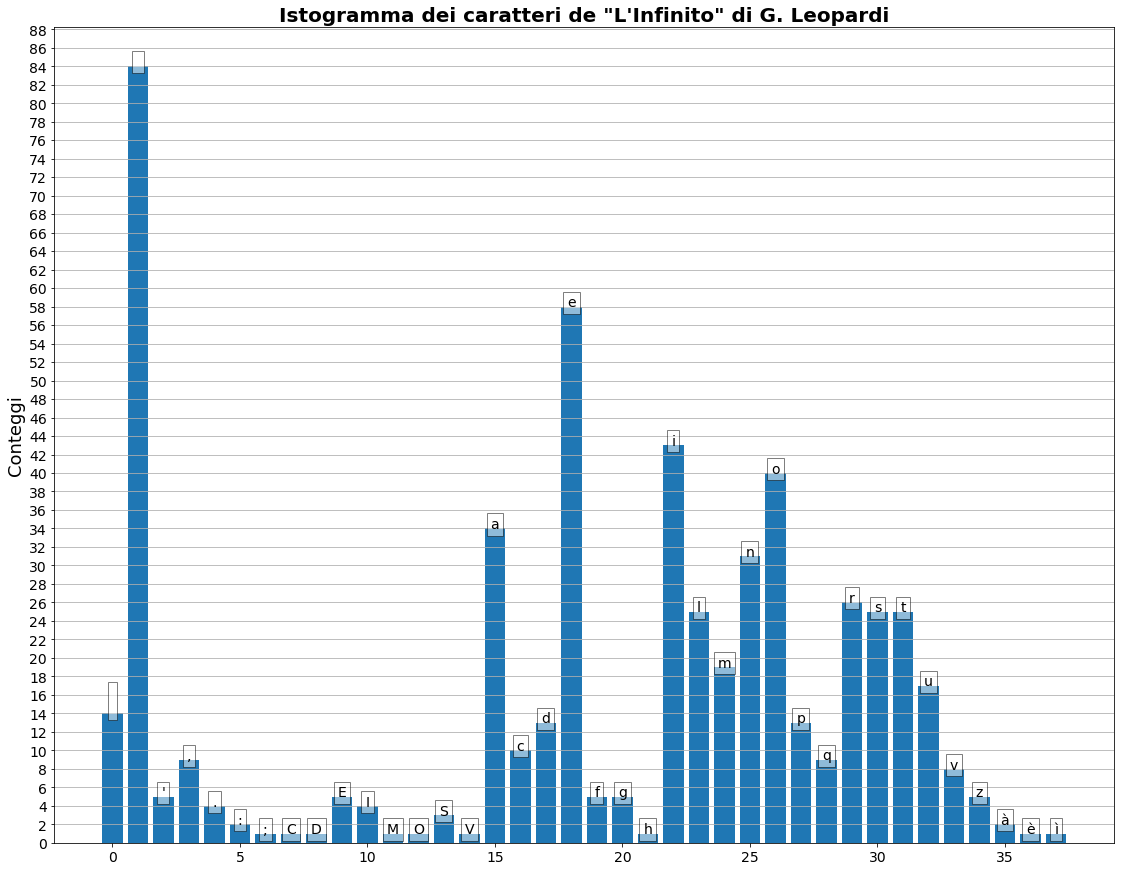

In [7]:
x = range(len(letter_freq.keys()))
y = letter_freq.values()
bar_labels = letter_set_list
tick_labels = [ch.encode('utf').decode('utf') for ch in letter_set_list]

fig1 = plt.figure(figsize=(19,15))
p1 = plt.bar(x,y,align='center')

plt.title('Istogramma dei caratteri de "L\'Infinito" di G. Leopardi',fontsize=20,fontweight='bold')
plt.ylabel('Conteggi',fontsize=18)

for _x, _y, t in zip(x, y, bar_labels):
    plt.annotate(t, (_x, _y), fontsize=14, ha='center',
                xytext=(0, 0), textcoords='offset pixels',
                bbox={'facecolor': 'w','alpha':0.5})

plt.xticks(fontsize=14)
plt.yticks(range(0,90,2),fontsize=14)

plt.grid(axis='y')
plt.show()

fig1.savefig('p1.png')
plt.close(fig1) 

# Pandas

Con pandas puoi gestire i dati con un comodo dataframe. Rispetto all'uso diretto della libreria matplotlib, pandas ti porta direttamente ad un risultato ordinato.

In [8]:
import pandas as pd

In [9]:
df = pd.DataFrame(let_comprehension,columns=['Caratteri'])

In [10]:
df

,Caratteri
0,S
1,e
2,m
3,p
4,r
5,e
6,
7,c
8,a
9,r


In [11]:
df.Caratteri.value_counts().values

array([84, 58, 43, 40, 34, 31, 26, 25, 25, 25, 19, 17, 14, 13, 13, 10,  9,
        9,  8,  5,  5,  5,  5,  5,  4,  4,  3,  2,  2,  1,  1,  1,  1,  1,
        1,  1,  1,  1], dtype=int64)

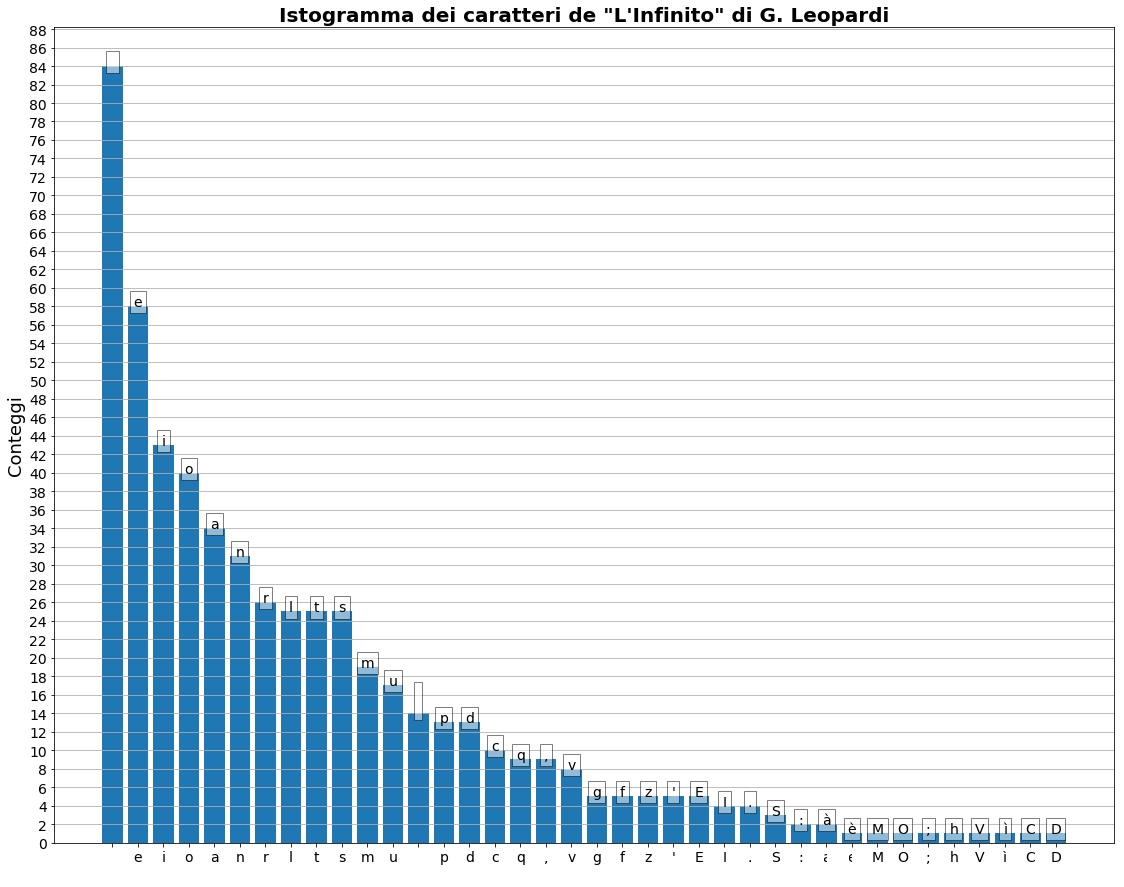

In [12]:
fig2 = plt.figure(figsize=(19,15))

plt.title('Istogramma dei caratteri de "L\'Infinito" di G. Leopardi',fontsize=20,fontweight='bold')
plt.ylabel('Conteggi',fontsize=18)

x = df.Caratteri.value_counts().index
y = df.Caratteri.value_counts().values
bar_labels = df.Caratteri.value_counts().index

p2 = plt.bar(x,y)
plt.xticks(fontsize=14)
plt.yticks(range(0,90,2),fontsize=14)
plt.grid(axis='y')
for _x, _y, t in zip(x, y, bar_labels):
    plt.annotate(t, (_x, _y), fontsize=14, ha='center',
                xytext=(0, 0), textcoords='offset pixels',
                bbox={'facecolor': 'w','alpha':0.5})

plt.show()

fig2.savefig('p2.png')
plt.close(fig2) 

# Conclusione

Oggi abbiamo visto 3 modi per visualizzare gli istogrammi di caratteri di un testo